In [2]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
#loading data
data=pd.read_csv('/content/cleaned_data_telecomchurn.csv')


In [4]:
data

,Unnamed: 0,telecom_partner,gender,age,age_decay_range,age_interval,state,city,region,registration_year,...,num_dependents,single or not,estimated_salary,calls_made,calls_made_negative,sms_sent,sms_sent_negative,data_used,data_used_negative,churn
0,0,Reliance Jio,F,25.0,20.0,Young Adults,Karnataka,Kolkata,South India,2020.0,...,4.0,Not single,124962.0,44.0,0.0,45.0,0.0,361.0,1.0,0.0
1,1,Reliance Jio,F,55.0,50.0,Old Adults,Mizoram,Mumbai,Northeast India,2020.0,...,2.0,Not single,130556.0,62.0,0.0,39.0,0.0,5973.0,0.0,0.0
2,2,Vodafone,F,57.0,50.0,Old Adults,Arunachal Pradesh,Delhi,Northeast India,2020.0,...,0.0,Single,148828.0,49.0,0.0,24.0,0.0,193.0,0.0,1.0
3,3,BSNL,M,46.0,40.0,Old Adults,Tamil Nadu,Kolkata,South India,2020.0,...,1.0,Not single,38722.0,80.0,0.0,25.0,0.0,9377.0,0.0,1.0
4,4,BSNL,F,26.0,20.0,Old Adults,Tripura,Delhi,Northeast India,2020.0,...,2.0,Not single,55098.0,78.0,0.0,15.0,0.0,1393.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84151,84151,Reliance Jio,F,22.0,20.0,Old Adults,Kerala,Bangalore,South India,2021.0,...,2.0,Not single,53321.0,70.0,0.0,27.0,0.0,5537.0,0.0,0.0
84152,84152,Airtel,M,42.0,40.0,Old Adults,Tamil Nadu,Mumbai,South India,2021.0,...,1.0,Not single,24827.0,70.0,0.0,1.0,1.0,2488.0,0.0,0.0
84153,84153,Airtel,M,27.0,20.0,Young Adults,Meghalaya,Delhi,Northeast India,2021.0,...,3.0,Not single,85833.0,49.0,0.0,27.0,0.0,2793.0,0.0,1.0
84154,84154,BSNL,M,58.0,50.0,Old Adults,Mizoram,Chennai,Northeast India,2021.0,...,0.0,Single,69328.0,36.0,0.0,2.0,0.0,7556.0,0.0,0.0


In [5]:
#show information of data
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84156 entries, 0 to 84155
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           84156 non-null  int64  
 1   telecom_partner      84156 non-null  object 
 2   gender               84155 non-null  object 
 3   age                  84155 non-null  float64
 4   age_decay_range      84155 non-null  float64
 5   age_interval         84155 non-null  object 
 6   state                84155 non-null  object 
 7   city                 84155 non-null  object 
 8   region               84155 non-null  object 
 9   registration_year    84155 non-null  float64
 10  registration_month   84155 non-null  float64
 11  registration_day     84155 non-null  float64
 12  num_dependents       84155 non-null  float64
 13  single or not        84155 non-null  object 
 14  estimated_salary     84155 non-null  float64
 15  calls_made           84155 non-null 

In [6]:
#description
data.describe()

,Unnamed: 0,age,age_decay_range,registration_year,registration_month,registration_day,num_dependents,estimated_salary,calls_made,calls_made_negative,sms_sent,sms_sent_negative,data_used,data_used_negative,churn
count,84156.000000,84155.000000,84155.000000,84155.000000,84155.000000,84155.000000,84155.000000,84155.000000,84155.000000,84155.000000,84155.000000,84155.000000,84155.000000,84155.000000,84155.000000
mean,42077.500000,46.130687,41.716119,2020.131056,5.848494,15.593227,1.999941,85027.013309,49.128228,0.027877,24.048684,0.029719,5018.608377,0.023873,0.199430
std,24293.888964,16.441920,16.831282,0.337463,3.649096,8.758475,1.414520,37587.591947,29.049019,0.164622,14.485031,0.169812,2912.452585,0.152653,0.399574
min,0.000000,18.000000,10.000000,2020.000000,1.000000,1.000000,0.000000,20001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21038.750000,32.000000,30.000000,2020.000000,2.000000,8.000000,1.000000,52448.000000,24.000000,0.000000,11.000000,0.000000,2508.000000,0.000000,0.000000
50%,42077.500000,46.000000,40.000000,2020.000000,6.000000,16.000000,2.000000,85035.000000,49.000000,0.000000,24.000000,0.000000,4994.000000,0.000000,0.000000
75%,63116.250000,60.000000,60.000000,2020.000000,9.000000,23.000000,3.000000,117698.000000,74.000000,0.000000,36.000000,0.000000,7494.000000,0.000000,0.000000
max,84155.000000,74.000000,70.000000,2021.000000,12.000000,31.000000,4.000000,149997.000000,108.000000,1.000000,53.000000,1.000000,10990.000000,1.000000,1.000000


#Visualization

<Axes: xlabel='count', ylabel='region'>

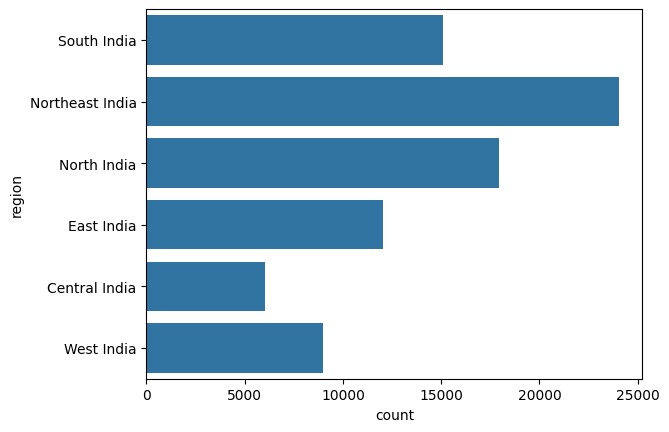

In [7]:
#Show the most region used telecom
sns.countplot(data['region'])

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27],
 [Text(0, 0, 'Karnataka'),
  Text(1, 0, 'Mizoram'),
  Text(2, 0, 'Arunachal Pradesh'),
  Text(3, 0, 'Tamil Nadu'),
  Text(4, 0, 'Tripura'),
  Text(5, 0, 'Uttarakhand'),
  Text(6, 0, 'Himachal Pradesh'),
  Text(7, 0, 'Rajasthan'),
  Text(8, 0, 'Odisha'),
  Text(9, 0, 'Uttar Pradesh'),
  Text(10, 0, 'Chhattisgarh'),
  Text(11, 0, 'Madhya Pradesh'),
  Text(12, 0, 'Manipur'),
  Text(13, 0, 'Goa'),
  Text(14, 0, 'West Bengal'),
  Text(15, 0, 'Gujarat'),
  Text(16, 0, 'Telangana'),
  Text(17, 0, 'Maharashtra'),
  Text(18, 0, 'Haryana'),
  Text(19, 0, 'Andhra Pradesh'),
  Text(20, 0, 'Sikkim'),
  Text(21, 0, 'Assam'),
  Text(22, 0, 'Jharkhand'),
  Text(23, 0, 'Kerala'),
  Text(24, 0, 'Punjab'),
  Text(25, 0, 'Nagaland'),
  Text(26, 0, 'Bihar'),
  Text(27, 0, 'Meghalaya')])

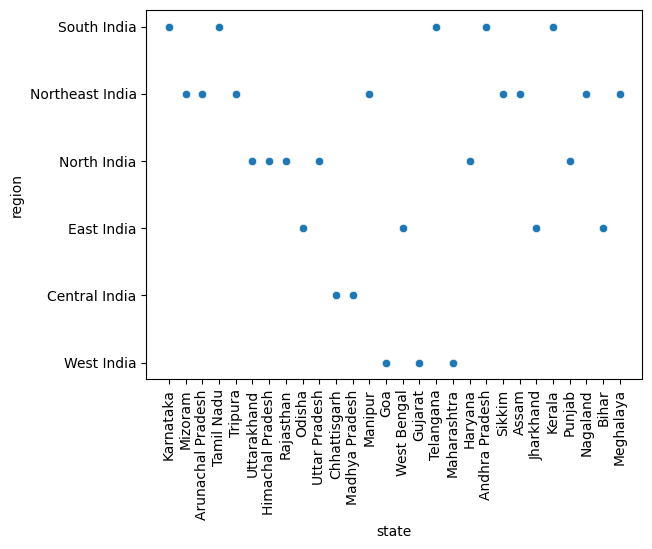

In [17]:
#show the state in each region
sns.scatterplot(data=data, x='state', y='region')
plt.xticks(rotation=90)

<Axes: xlabel='city', ylabel='state'>

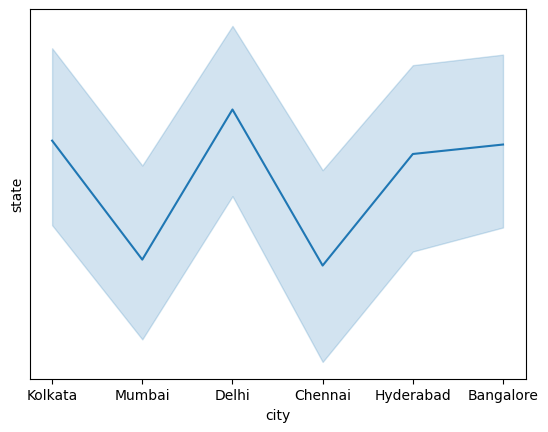

In [9]:
#Shows the city with the most states
sns.lineplot(data=data, x='city', y='state')